In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# from lib.dataloader import PassiveMicrowaveDataset
import time
import os
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from IPython.display import clear_output
import numpy as np


In [2]:
ds = xr.open_dataset("/lustre/storeB/project/metkl/DigitalSeaIce/are-phd/SuperResolutionSeaIce/Dataset/AMSRSSMI/2020/03/amsrssmi_nh-ease2-125_2020031512.nc")
# Extract variables
ssmi_tb37h = ds['ssmi_tb37h']
ssmi_tb37v = ds['ssmi_tb37v']
amsr_tb37h = ds['amsr_tb37h']
amsr_tb37v = ds['amsr_tb37v']

In [3]:
print(ssmi_tb37h**2)
print(164.13124**2)

<xarray.DataArray 'ssmi_tb37h' (yc: 416, xc: 416)> Size: 692kB
array([[      nan,       nan,       nan, ..., 40538.266, 39914.58 ,
        39577.77 ],
       [26939.064,       nan,       nan, ...,       nan, 38892.293,
        37896.434],
       [24228.227, 21148.986,       nan, ...,       nan,       nan,
              nan],
       ...,
       [23584.549, 23576.08 , 23597.898, ...,       nan,       nan,
              nan],
       [23880.625, 23712.852, 23691.61 , ...,       nan,       nan,
              nan],
       [23882.92 , 23832.324, 23767.27 , ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 8B ...
  * xc       (xc) float64 3kB -2.994e+03 -2.981e+03 ... 2.181e+03 2.194e+03
  * yc       (yc) float64 3kB 2.706e+03 2.694e+03 ... -2.469e+03 -2.481e+03
26939.063943937595


In [4]:
plt.rcParams.update({'font.size': plt.rcParams['font.size'] + 3})

In [5]:
def plot_single_file(file_path):
    ds = xr.open_dataset(file_path)
    # Extract variables
    ssmi_tb37h = ds['ssmi_tb37h']
    ssmi_tb37v = ds['ssmi_tb37v']
    amsr_tb37h = ds['amsr_tb37h']
    amsr_tb37v = ds['amsr_tb37v']

    # Determine common color scale
    vminh = min(ssmi_tb37h.min(), amsr_tb37h.min())
    vmaxh = max(ssmi_tb37h.max(), amsr_tb37h.max())
    vminv = min(ssmi_tb37v.min(), amsr_tb37v.min())
    vmaxv = max(ssmi_tb37v.max(), amsr_tb37v.max())

    # Create figure and axes
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    # Define plot function
    def plot_data(ax, data, vmin, vmax):
        im = data.plot(ax=ax, cmap='jet', vmin=vmin, vmax=vmax, add_colorbar=False)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('black')
        return im
    print(ssmi_tb37v.shape)
    # Plot data
    im1 = plot_data(axes[0, 0], ssmi_tb37h, vminh, vmaxh)
    im2 = plot_data(axes[0, 1], amsr_tb37h, vminh, vmaxh)
    im3 = plot_data(axes[1, 0], ssmi_tb37v, vminv, vmaxv)
    im4 = plot_data(axes[1, 1], amsr_tb37v, vminv, vmaxv)

    # Column titles
    axes[0, 0].set_title("SSMI 37 GHz")
    axes[0, 1].set_title("AMSR 37 GHz")
    axes[1, 0].set_title("")
    axes[1, 1].set_title("")

    # Row labels
    axes[0, 0].annotate("H-Pol", xy=(-0.05, 0.5), xycoords='axes fraction', fontsize=12, ha='center', va='center', rotation=90)
    axes[1, 0].annotate("V-Pol", xy=(-0.05, 0.5), xycoords='axes fraction', fontsize=12, ha='center', va='center', rotation=90)

    # Add colorbars for each row
    cbar_ax1 = fig.add_axes([0.9, 0.5, 0.02, 0.455])  # Top row
    cbar_ax2 = fig.add_axes([0.9, 0.02, 0.02, 0.455])  # Bottom row
    fig.colorbar(im1, cax=cbar_ax1, label='Brightness Temperature (K)')
    fig.colorbar(im3, cax=cbar_ax2, label='Brightness Temperature (K)')

    plt.tight_layout(rect=[0, 0, 0.9, 1])


In [6]:
# Load the dataset
file_path_winter_ext = "/lustre/storeB/project/metkl/DigitalSeaIce/are-phd/SuperResolutionSeaIce/Dataset/AMSRSSMI/2020/03/amsrssmi_nh-ease2-125_2020031512.nc"
file_path_summer_ext = "/lustre/storeB/project/metkl/DigitalSeaIce/are-phd/SuperResolutionSeaIce/Dataset/AMSRSSMI/2020/09/amsrssmi_nh-ease2-125_2020091512.nc"

(416, 416)


/tmp/ipykernel_2276914/3025624436.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


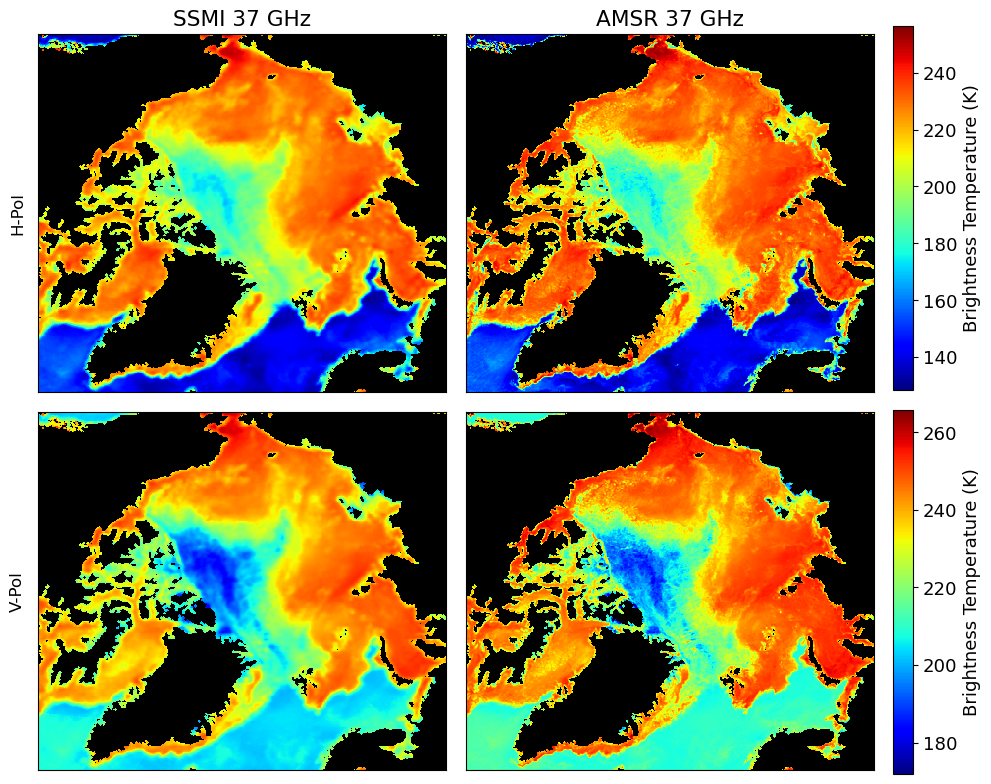

(416, 416)


/tmp/ipykernel_2276914/3025624436.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


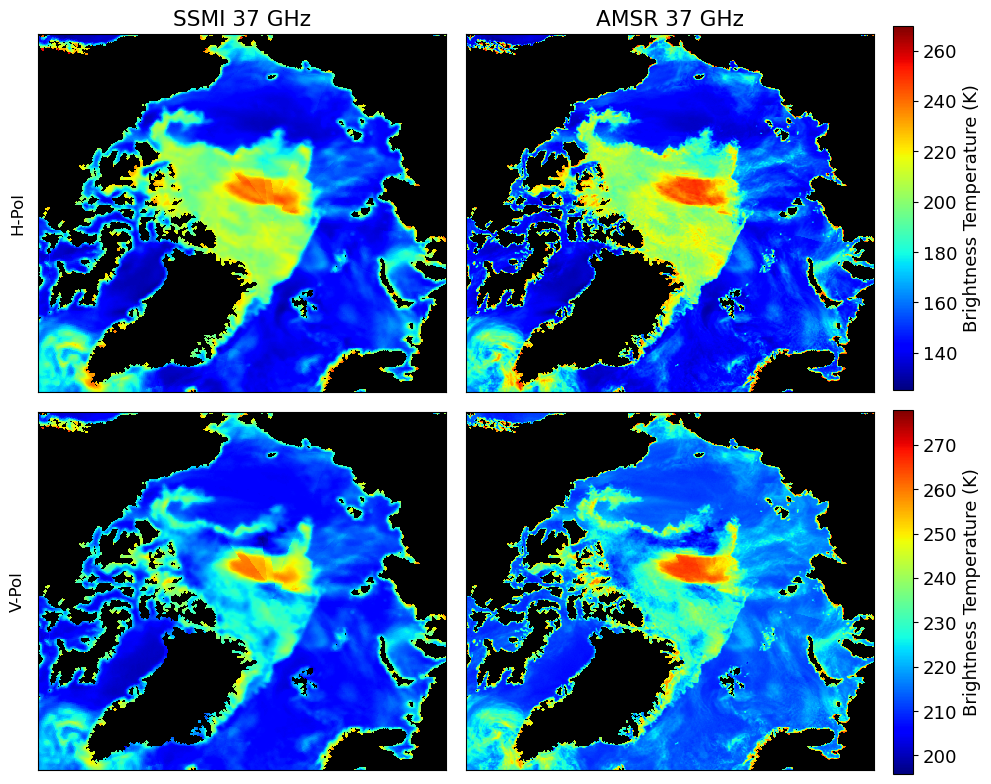

In [7]:
plot_single_file(file_path_winter_ext)
# plt.savefig('figures/example_2020031512.png')
plt.show()
plot_single_file(file_path_summer_ext)
# plt.savefig('figures/example_2020091512.png')
plt.show()


/tmp/ipykernel_2276914/1552052010.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .89, .95])


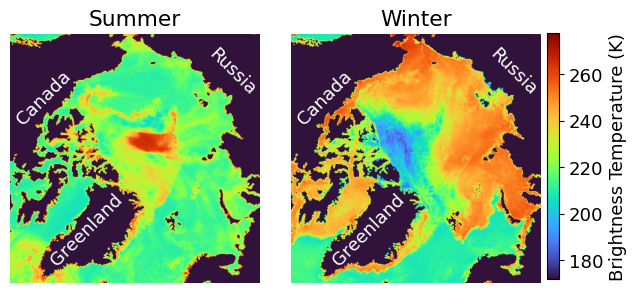

In [27]:
file_path_winter_ext = "/lustre/storeB/project/metkl/DigitalSeaIce/are-phd/SuperResolutionSeaIce/Dataset/AMSRSSMI/2020/03/amsrssmi_nh-ease2-125_2020031512.nc"
file_path_summer_ext = "/lustre/storeB/project/metkl/DigitalSeaIce/are-phd/SuperResolutionSeaIce/Dataset/AMSRSSMI/2020/09/amsrssmi_nh-ease2-125_2020091512.nc"

ds_s = xr.open_dataset(file_path_summer_ext)
ds_w = xr.open_dataset(file_path_winter_ext)

# Extract variables
summer = ds_s['amsr_tb37v']
winter = ds_w['amsr_tb37v']


# Determine common color scale
vminv = min(summer.min(), winter.min())
vmaxv = max(summer.max(), winter.max())

summer = ds_s['amsr_tb37v'].fillna(0)
winter = ds_w['amsr_tb37v'].fillna(0)

# Create figure and axes

fig, axs = plt.subplots(1, 2, figsize=(6.4, 3.2))

# V-pol comparison
im1 = axs[0].imshow(summer, cmap='turbo', vmin=vminv, vmax=vmaxv)
axs[0].axis('off')
axs[0].set_title("Summer")
axs[0].text(62, 385, "Greenland", color='white', fontsize=13, rotation=45)
axs[0].text(5, 150, "Canada", color='white', fontsize=13, rotation=45)
axs[0].text(325, 100, "Russia", color='white', fontsize=13, rotation=-45)

im2 = axs[1].imshow(winter, cmap='turbo', vmin=vminv, vmax=vmaxv)
axs[1].axis('off')
axs[1].set_title("Winter")
axs[1].text(62, 385, "Greenland", color='white', fontsize=13, rotation=45)
axs[1].text(5, 150, "Canada", color='white', fontsize=13, rotation=45)
axs[1].text(325, 100, "Russia", color='white', fontsize=13, rotation=-45)


# Add colorbar
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.04, pad=0.04, shrink= 1.0)
cbar.set_label("Brightness Temperature (K)")

# Move colorbar down by adjusting its position
cbar_ax = cbar.ax
pos = cbar_ax.get_position()
# Modify the y-position (second value) and height (fourth value) slightly
cbar_ax.set_position([pos.x0, pos.y0 - 0.02, pos.width, pos.height])

plt.tight_layout(rect=[0, 0, .89, .95])
plt.savefig("final_figures/arctic_example.pdf", bbox_inches="tight")
plt.savefig("final_figures/arctic_example.png", bbox_inches="tight")
